In [1]:
!pip install xlrd

## Import dataset

In [2]:
import pandas as pd
df=pd.read_excel('LoanTrain.xlsx')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Drop the ID column

In [3]:
df.drop('Loan_ID',axis=1,inplace=True)

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Missing Values

### 1st column

In [17]:
df['Gender'].isnull().sum()

0

In [4]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

### 2nd column

In [20]:
df['Married'].isnull().sum()

0

In [5]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

### 3rd column

In [23]:
df['Dependents'].isnull().sum()

0

In [6]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

### 4th column

In [24]:
df['Education'].isnull().sum()

0

### 5th column

In [27]:
df['Self_Employed'].isnull().sum()

0

In [7]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

### 6th column

In [28]:
df['ApplicantIncome'].isnull().sum()

0

### 7th column

In [30]:
df['CoapplicantIncome'].isnull().sum()

0

### 8th column

In [33]:
df['LoanAmount'].isnull().sum()

0

In [8]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

### 9th column

In [37]:
df['Loan_Amount_Term'].isnull().sum()

0

In [35]:
df['Loan_Amount_Term'].value_counts() # so go with mode instead of mean

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [9]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

### 10th column

In [41]:
df['Credit_History'].isnull().sum()

0

In [39]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [10]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

### 11th column

In [42]:
df['Property_Area'].isnull().sum()

0

### 12th column

In [43]:
df['Loan_Status'].isnull().sum()

0

## Convert Categorical variables

### 1st column

In [11]:
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1], inplace=True)

### 2nd column

In [12]:
df['Married'].replace(to_replace=['Yes','No'], value=[0,1], inplace=True)

### 3rd column

In [13]:
df['Dependents'].replace(to_replace=['3+'], value=[3], inplace=True)

### 4th column

In [15]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [14]:
df['Education'].replace(to_replace=['Graduate','Not Graduate'], value=[0,1], inplace=True)

### 5th column

In [17]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df['Self_Employed'].replace(to_replace=['Yes','No'], value=[0,1], inplace=True)

### 6th column

In [19]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [16]:
df['Property_Area'].replace(to_replace=['Urban','Semiurban','Rural'], value=[0,1,2], inplace=True)

### Output Variable

In [17]:
df['Loan_Status'].replace(to_replace=['Y','N'], value=[0,1], inplace=True)

### Verify

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,5849,0.0,146.412162,360.0,1.0,0,Y
1,0,0,1,0,1,4583,1508.0,128.000000,360.0,1.0,2,N
2,0,0,0,0,0,3000,0.0,66.000000,360.0,1.0,0,Y
3,0,0,0,1,1,2583,2358.0,120.000000,360.0,1.0,0,Y
4,0,1,0,0,1,6000,0.0,141.000000,360.0,1.0,0,Y


In [24]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.346906,0.744300,0.218241,0.866450,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.962541
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


## Feature Selection

In [18]:
import numpy as np

In [19]:
X=df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']].values

In [20]:
y=df[['Loan_Status']].values

### Chi Square

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fiit=bestfeatures.fit(X,y)

In [23]:
dfscores=pd.DataFrame(fiit.scores_)
dfcolumns=pd.DataFrame(df.columns)

In [24]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']

In [25]:
featureScores

,Specs,Score
0,Gender,0.162407
1,Married,3.355645
2,Dependents,0.085953
3,Education,3.540502
4,Self_Employed,0.001123
5,ApplicantIncome,93.904964
6,CoapplicantIncome,11342.041603
7,LoanAmount,39.211545
8,Loan_Amount_Term,3.778554
9,Credit_History,26.005877


In [26]:
print(featureScores.nlargest(12,'Score'))

                Specs         Score
6   CoapplicantIncome  11342.041603
5     ApplicantIncome     93.904964
7          LoanAmount     39.211545
9      Credit_History     26.005877
8    Loan_Amount_Term      3.778554
3           Education      3.540502
1             Married      3.355645
10      Property_Area      0.407246
0              Gender      0.162407
2          Dependents      0.085953
4       Self_Employed      0.001123


#### ANOVA

### Correlation

In [68]:
from scipy import stats

In [76]:
Pearson_coef1,p_value1=stats.pearsonr(df['Gender'],df['Loan_Status'])
Pearson_coef1,p_value1

(0.01798667870703222, 0.6564497584643865)

In [77]:
Pearson_coef2,p_value2=stats.pearsonr(df['Married'],df['Loan_Status'])
Pearson_coef2,p_value2

(0.09147782473606052, 0.02339836279662128)

In [78]:
Pearson_coef3,p_value3=stats.pearsonr(df['Dependents'],df['Loan_Status'])
Pearson_coef3,p_value3

(-0.010118454497004539, 0.8024165133443726)

In [80]:
Pearson_coef4,p_value4=stats.pearsonr(df['Education'],df['Loan_Status'])
Pearson_coef4,p_value4

(0.08588391467536532, 0.03336067753729217)

In [81]:
Pearson_coef5,p_value5=stats.pearsonr(df['Self_Employed'],df['Loan_Status'])
Pearson_coef5,p_value5

(-0.0037004377149821976, 0.9270899835545255)

In [82]:
Pearson_coef6,p_value6=stats.pearsonr(df['ApplicantIncome'],df['Loan_Status'])
Pearson_coef6,p_value6

(0.004709522659351522, 0.9072878121306787)

In [83]:
Pearson_coef7,p_value7=stats.pearsonr(df['CoapplicantIncome'],df['Loan_Status'])
Pearson_coef7,p_value7

(0.05918731348785011, 0.14294828684288485)

In [84]:
Pearson_coef8,p_value8=stats.pearsonr(df['LoanAmount'],df['Loan_Status'])
Pearson_coef8,p_value8

(0.0364160099723706, 0.36768764508205704)

In [86]:
Pearson_coef9,p_value9=stats.pearsonr(df['Loan_Amount_Term'],df['Loan_Status'])
Pearson_coef9,p_value9

(0.022548993503422713, 0.5770667590788445)

In [85]:
Pearson_coef10,p_value10=stats.pearsonr(df['Credit_History'],df['Loan_Status'])
Pearson_coef10,p_value10

(-0.5405560719222487, 7.019682032030208e-48)

In [87]:
Pearson_coef11,p_value11=stats.pearsonr(df['Property_Area'],df['Loan_Status'])
Pearson_coef11,p_value11

(0.03211198462880029, 0.4270283509203211)

### Heat Map

In [88]:
!pip install seaborn

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
corrmat=df.corr()

In [91]:
top_corr_features=corrmat.index

In [94]:
plt.figure(figsize=(40,40))

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

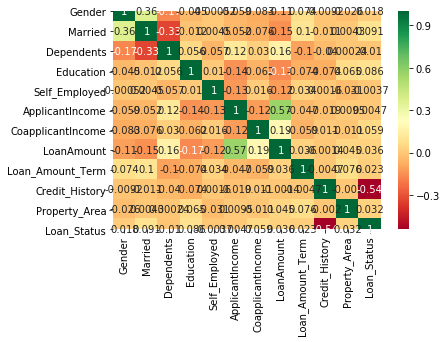

In [95]:
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

## Feature Scaling

In [27]:
X1=df[['Married','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Property_Area']].values

In [28]:
y1=df[['Loan_Status']].values

In [29]:
from sklearn import preprocessing
X1=preprocessing.StandardScaler().fit(X1).transform(X1)

## Train/Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=4)

## ML Algorithm

### 1. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier(criterion="entropy",max_depth=1)
dectree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Hyperparameter tuning

In [102]:
from sklearn.model_selection import GridSearchCV

params={'criterion':['entropy','gini'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}

gd=GridSearchCV(estimator=dectree,param_grid=params,cv=3)

gd.fit(X_train,y_train)

gd.best_params_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy', 'max_depth': 1}

In [103]:
gd.best_score_

0.8158508158508159

In [24]:
pred1=dectree.predict(X_test)

In [25]:
pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0])

#### Accuracy

In [26]:
from sklearn import metrics
metrics.accuracy_score(y_test,pred1)

0.7945945945945946

### 2. SVM

In [27]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [112]:
params2={'kernel':['rbf','linear','sigmoid']}

gd2=GridSearchCV(estimator=clf,param_grid=params2,cv=3)

gd2.fit(X_train,y_train)

gd2.best_params_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: 

{'kernel': 'linear'}

In [113]:
gd2.best_score_

0.8158508158508159

In [28]:
pred2=clf.predict(X_test)

In [29]:
pred2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0])

In [30]:
metrics.accuracy_score(y_test,pred2)

0.7945945945945946

### 3. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01,solver='liblinear')
LR.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
params3={'solver':['newton-cg','liblinear','lbfgs','sag','saga']}

gd3=GridSearchCV(estimator=LR,param_grid=params3,cv=3)

gd3.fit(X_train,y_train)

gd3.best_params_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was pass

{'solver': 'liblinear'}

In [32]:
pred3=LR.predict(X_test)

In [33]:
pred3

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0])

In [35]:
from sklearn import metrics
metrics.accuracy_score(y_test,pred3)

0.8

### 4. KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

In [33]:
ks=11
mean_acc=np.zeros((ks-1))
for i in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    pred4=neigh.predict(X_test)
    mean_acc[i-1]=metrics.accuracy_score(pred4,y_test)
mean_acc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1

array([0.67567568, 0.73513514, 0.73513514, 0.76216216, 0.76216216,
       0.75675676, 0.75675676, 0.77297297, 0.76216216, 0.76216216])

In [34]:
k=8
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [35]:
pred5=neigh.predict(X_test)

In [36]:
pred5

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0])

In [38]:
metrics.accuracy_score(y_test,pred5)

0.772972972972973

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
raf = RandomForestClassifier(n_estimators=80, max_depth=5, bootstrap='False',
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
raf.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap='False', class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [46]:
pred6=raf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished


In [47]:
pred6

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0])

In [48]:
metrics.accuracy_score(y_test,pred6)

0.8

## Test Set

In [36]:
test_df=pd.read_excel('LoanTest.xlsx')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [37]:
test_df.drop(['Loan_ID'],axis=1,inplace=True)

test_df['Gender'].replace(to_replace=['Male','Female'],value=[0,1],inplace=True)

test_df['Gender'].fillna(test_df['Gender'].mode()[0],inplace=True)

test_df['Married'].replace(to_replace=['No','Yes'],value=[0,1],inplace=True)

test_df['Married'].fillna(test_df['Married'].mode()[0],inplace=True)

test_df['Dependents'].replace(to_replace=['3+'],value=[3],inplace=True)

test_df['Dependents'].fillna(test_df['Dependents'].mode()[0],inplace=True)

test_df['Education'].replace(to_replace=['Graduate','Not Graduate'],value=[1,0],inplace=True)

test_df['Self_Employed'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0],inplace=True)

test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0],inplace=True)

test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0],inplace=True)

test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(),inplace=True)

test_df['Property_Area'].replace(to_replace=['Rural','Semiurban','Urban'],value=[0,1,2],inplace=True)

In [51]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,2
1,0.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,2
2,0.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,2
3,0.0,1,2.0,1,0.0,2340,2546,100.0,360.0,1.0,2
4,0.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,2


In [38]:
test_X=test_df[['Married','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Property_Area']].values

In [39]:
result1=LR.predict(test_X) #Logistic Regression

In [40]:
result1

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [59]:
result2=neigh.predict(test_X) #KNN

In [56]:
result2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
result3=raf.predict(test_X) #Random Forest

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished


In [58]:
result3

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,

## Extract Result

In [ ]:
#result=pd.DataFrame(result1)
#result.to_csv(r'ResultFile.csv', index=False)

## Pickle Load

In [41]:
import pickle

In [42]:
pickle.dump(LR, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))